# importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [ ]:
path = r'C:\Users\katey\Desktop\Final Unit CareerFoundry\citi_7.csv'

In [3]:
citi = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citi_7.csv'), index_col = False)

In [4]:
data_types = {
    'ride_start_date': 'datetime64'
}

In [5]:
file_path = os.path.join(path, '02 Data','prepared data','citi_7.csv')

In [6]:
parse_dates = ['ride_start_date']

In [7]:
citi = pd.read_csv(file_path, parse_dates=parse_dates)

In [8]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41017 entries, 0 to 41016
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               41017 non-null  int64         
 1   day_of_week              41017 non-null  object        
 2   start_hour               41017 non-null  int64         
 3   start_station_id         41017 non-null  int64         
 4   start_station_name       41017 non-null  object        
 5   start_station_latitude   41017 non-null  float64       
 6   start_station_longitude  41017 non-null  float64       
 7   end_station_id           41017 non-null  int64         
 8   end_station_name         41017 non-null  object        
 9   end_station_latitude     41017 non-null  float64       
 10  end_station_longitude    41017 non-null  float64       
 11  trip_duration            41017 non-null  int64         
 12  subscriber               41017 n

In [10]:
day_counts = citi.groupby( citi['ride_start_date'].dt.date)['ride_start_date'].count()

In [11]:
day_counts

ride_start_date
2013-09-01     729
2013-09-02     708
2013-09-03    1331
2013-09-04    1469
2013-09-05    1372
2013-09-06    1452
2013-09-07    1134
2013-09-08    1129
2013-09-09    1393
2013-09-10    1579
2013-09-11    1532
2013-09-12    1339
2013-09-13    1630
2013-09-14    1129
2013-09-15    1169
2013-09-16    1291
2013-09-17    1596
2013-09-18    1600
2013-09-19    1578
2013-09-20    1703
2013-09-21    1165
2013-09-22    1061
2013-09-23    1498
2013-09-24    1662
2013-09-25    1598
2013-09-26    1683
2013-09-27    1535
2013-09-28    1248
2013-09-29    1102
2013-09-30    1602
Name: ride_start_date, dtype: int64

In [17]:
avg_ride_duration_day = citi.groupby('ride_start_date')['trip_duration'].mean()

In [15]:
avg_ride_duration_day

<bound method Series.reset_index of ride_start_date
2013-09-01    735.274348
2013-09-02    675.447740
2013-09-03    686.549962
2013-09-04    713.929204
2013-09-05    712.066327
2013-09-06    693.772039
2013-09-07    731.380952
2013-09-08    736.000000
2013-09-09    691.850682
2013-09-10    687.388220
2013-09-11    674.304830
2013-09-12    671.300971
2013-09-13    688.204294
2013-09-14    691.806023
2013-09-15    722.729683
2013-09-16    680.896979
2013-09-17    681.016291
2013-09-18    680.636875
2013-09-19    687.445501
2013-09-20    691.693482
2013-09-21    700.793133
2013-09-22    720.921772
2013-09-23    699.183578
2013-09-24    680.915162
2013-09-25    701.739675
2013-09-26    680.911468
2013-09-27    711.543974
2013-09-28    719.056090
2013-09-29    704.512704
2013-09-30    690.719725
Name: trip_duration, dtype: float64>

In [19]:
result = pd.DataFrame({'date': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': avg_ride_duration_day.values})

In [20]:
result

,date,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327
5,2013-09-06,1452,693.772039
6,2013-09-07,1134,731.380952
7,2013-09-08,1129,736.000000
8,2013-09-09,1393,691.850682
9,2013-09-10,1579,687.388220


In [21]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30 non-null     object 
 1   ride_count    30 non-null     int64  
 2   avg_duration  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [23]:
from datetime import datetime
result['datetime'] = pd.to_datetime(result['date']) 
result = result.set_index('datetime') 
result.drop(['date'], axis=1, inplace=True) 
result.head()

,ride_count,avg_duration
datetime,,
2013-09-01,729,735.274348
2013-09-02,708,675.447740
2013-09-03,1331,686.549962
2013-09-04,1469,713.929204
2013-09-05,1372,712.066327


This data was selected because it shows the launch month of Citi and can help to forcast for the upcoming months.

In [24]:
result_2 = result.reset_index()

In [25]:
result_2.head()

,datetime,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327


In [34]:
result_3 = result_2[['datetime','ride_count']]

In [35]:
result_3

,datetime,ride_count
0,2013-09-01,729
1,2013-09-02,708
2,2013-09-03,1331
3,2013-09-04,1469
4,2013-09-05,1372
5,2013-09-06,1452
6,2013-09-07,1134
7,2013-09-08,1129
8,2013-09-09,1393
9,2013-09-10,1579


In [38]:
result_3 = result.reset_index()

In [39]:
result_3

,datetime,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327
5,2013-09-06,1452,693.772039
6,2013-09-07,1134,731.380952
7,2013-09-08,1129,736.000000
8,2013-09-09,1393,691.850682
9,2013-09-10,1579,687.388220


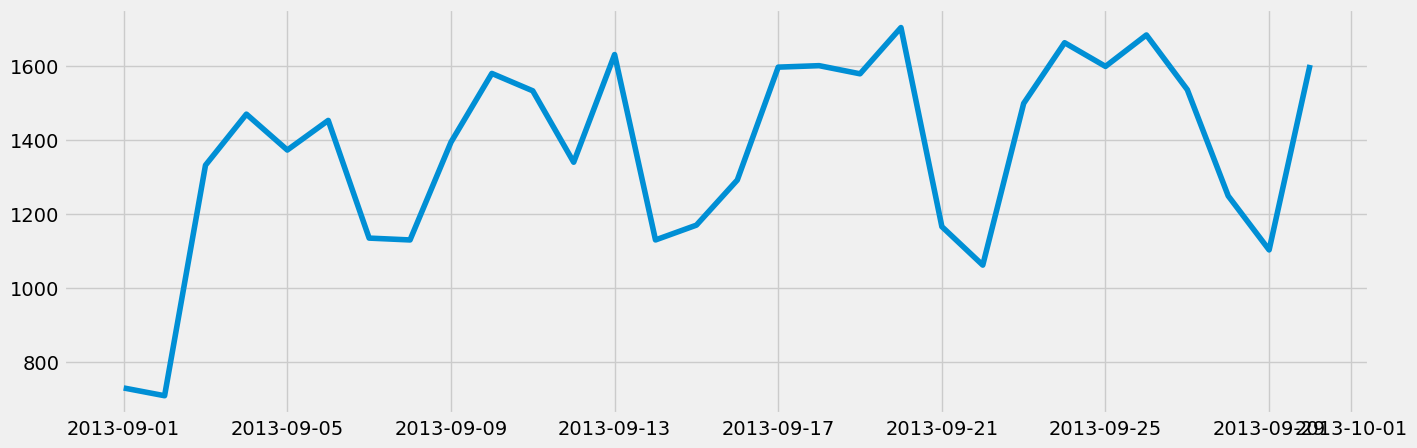

In [42]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(day_counts)

There is a correlation between day and ride count so I want to dig futher into that.

In [40]:
day_counts

ride_start_date
2013-09-01     729
2013-09-02     708
2013-09-03    1331
2013-09-04    1469
2013-09-05    1372
2013-09-06    1452
2013-09-07    1134
2013-09-08    1129
2013-09-09    1393
2013-09-10    1579
2013-09-11    1532
2013-09-12    1339
2013-09-13    1630
2013-09-14    1129
2013-09-15    1169
2013-09-16    1291
2013-09-17    1596
2013-09-18    1600
2013-09-19    1578
2013-09-20    1703
2013-09-21    1165
2013-09-22    1061
2013-09-23    1498
2013-09-24    1662
2013-09-25    1598
2013-09-26    1683
2013-09-27    1535
2013-09-28    1248
2013-09-29    1102
2013-09-30    1602
Name: ride_start_date, dtype: int64

In [43]:
day_counts.isnull().sum() 

0

In [49]:
result

,ride_count,avg_duration
datetime,,
2013-09-01,729,735.274348
2013-09-02,708,675.447740
2013-09-03,1331,686.549962
2013-09-04,1469,713.929204
2013-09-05,1372,712.066327
2013-09-06,1452,693.772039
2013-09-07,1134,731.380952
2013-09-08,1129,736.000000
2013-09-09,1393,691.850682


In [50]:
column_to_drop = 'avg_duration'

In [51]:
result = result.drop(column_to_drop, axis=1)

In [52]:
result

,ride_count
datetime,
2013-09-01,729
2013-09-02,708
2013-09-03,1331
2013-09-04,1469
2013-09-05,1372
2013-09-06,1452
2013-09-07,1134
2013-09-08,1129
2013-09-09,1393


I chose these data points 

In [55]:
result_1 = result.reset_index()

In [56]:
result_1

,datetime,ride_count
0,2013-09-01,729
1,2013-09-02,708
2,2013-09-03,1331
3,2013-09-04,1469
4,2013-09-05,1372
5,2013-09-06,1452
6,2013-09-07,1134
7,2013-09-08,1129
8,2013-09-09,1393
9,2013-09-10,1579


In [58]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    30 non-null     datetime64[ns]
 1   ride_count  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 608.0 bytes


In [60]:
time_series = result_1['ride_count']

In [63]:
result_1['datetime'] = pd.to_datetime(result_1['datetime'])

In [64]:
result_1.set_index('datetime', inplace=True)

In [65]:
result_1.index.freq = 'D'

In [66]:
time_series = result_1['ride_count']

In [67]:
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')


In [68]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

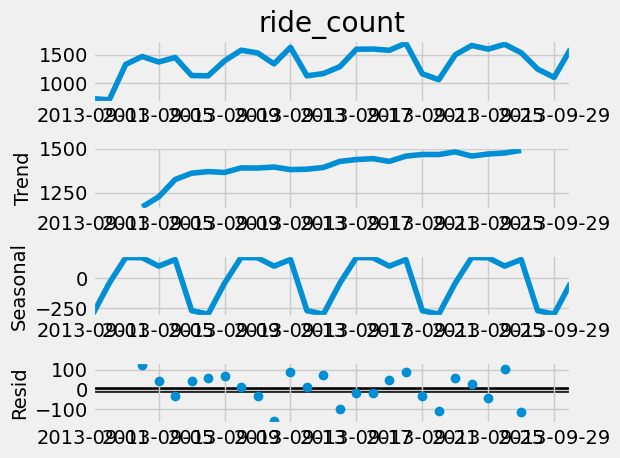

In [69]:
decomposition.plot()
plt.show()

In [70]:
result_1

,ride_count
datetime,
2013-09-01,729
2013-09-02,708
2013-09-03,1331
2013-09-04,1469
2013-09-05,1372
2013-09-06,1452
2013-09-07,1134
2013-09-08,1129
2013-09-09,1393


There appears to be seasonality with the data so my idea of being able to forcast appears to be correct.

In [71]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(result_1['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.728335
p-value                         0.003732
Number of Lags Used             6.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


The test statistic has a lower value then the critical value so the null hypothesis (the day of the week does not affect the number of riders) is invalid. Because it clearly shows through the visuals that the day of the week has an impact on the number of riders.

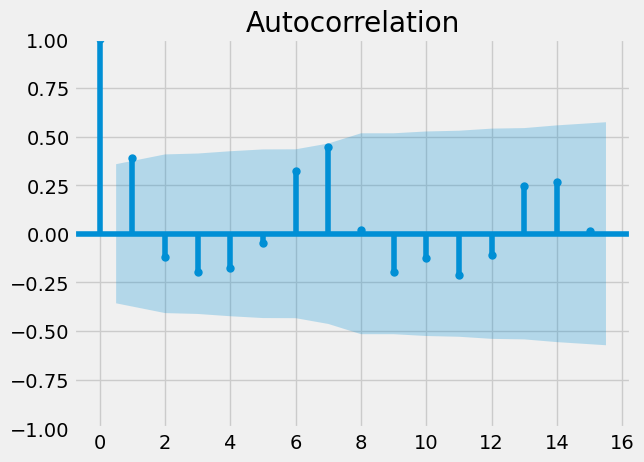

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plot_acf(result_1)
plt.show()

# BONUS TASK

In [74]:
data_diff = result_1- result_1.shift(1) 

In [75]:
data_diff.dropna(inplace = True) 

In [76]:
data_diff.head()

,ride_count
datetime,
2013-09-02,-21.0
2013-09-03,623.0
2013-09-04,138.0
2013-09-05,-97.0
2013-09-06,80.0


In [78]:
data_diff.columns

Index(['ride_count'], dtype='object')

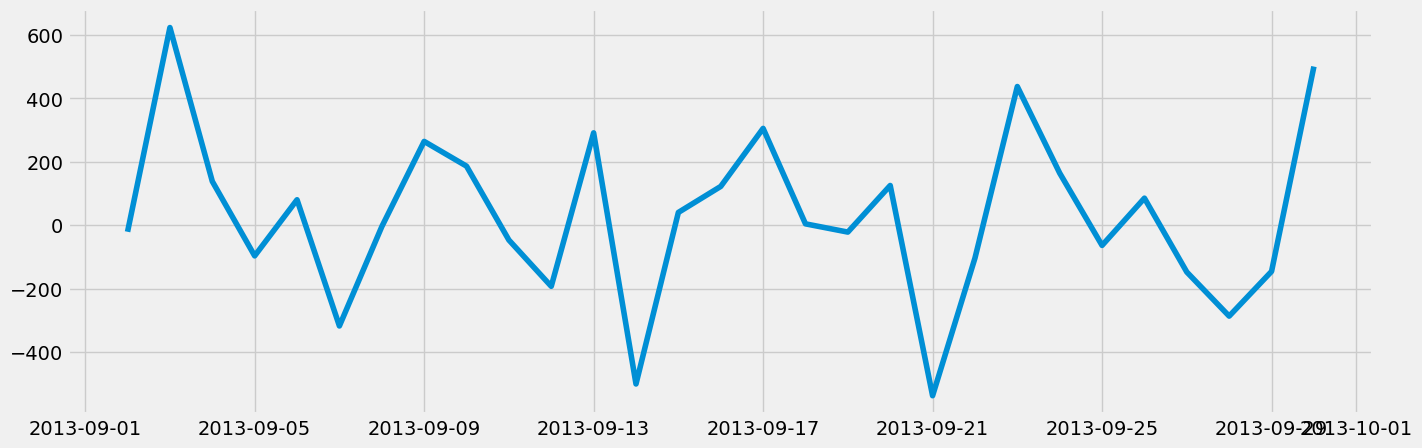

In [79]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [80]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.726936
p-value                         0.069492
Number of Lags Used             9.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


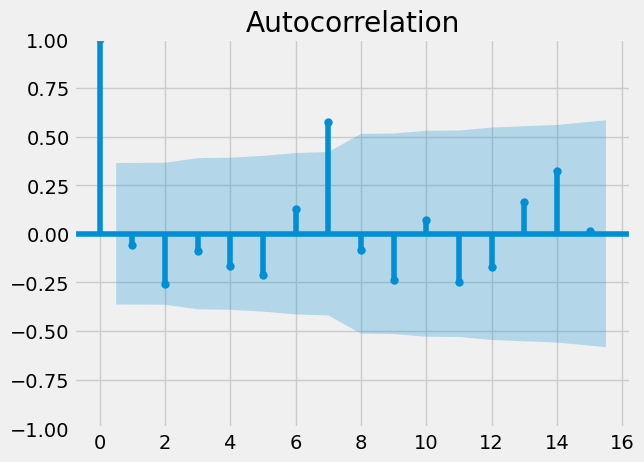

In [81]:
plot_acf(data_diff)
plt.show()

In [83]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2013-09-01 to 2013-09-30
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ride_count  30 non-null     int64
dtypes: int64(1)
memory usage: 480.0 bytes


In [91]:
result_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      30 non-null     datetime64[ns]
 1   ride_count    30 non-null     int64         
 2   avg_duration  30 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 848.0 bytes


In [92]:
result_4= result_3.drop(column_to_drop, axis=1)

In [94]:
result_4 = result_4.reset_index()

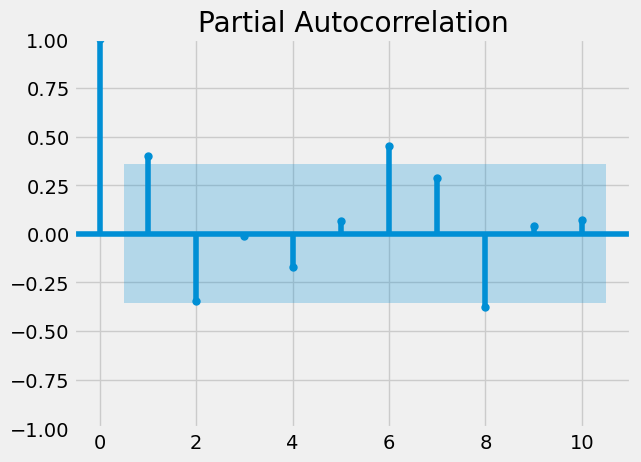

<Figure size 4500x4500 with 0 Axes>

In [100]:
plot_pacf(result_1['ride_count'], lags=10)  # Adjust the number of lags as needed
plt.figure(figsize=(15, 15), dpi=300)
plt.show()

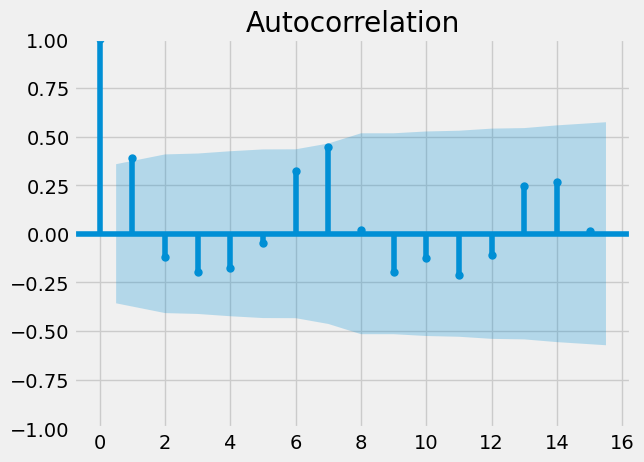

<Figure size 1500x500 with 0 Axes>

In [101]:
plot_acf(result_1)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

In [103]:
train = result_1['ride_count'][:24]
test = result_1['ride_count'][23:]

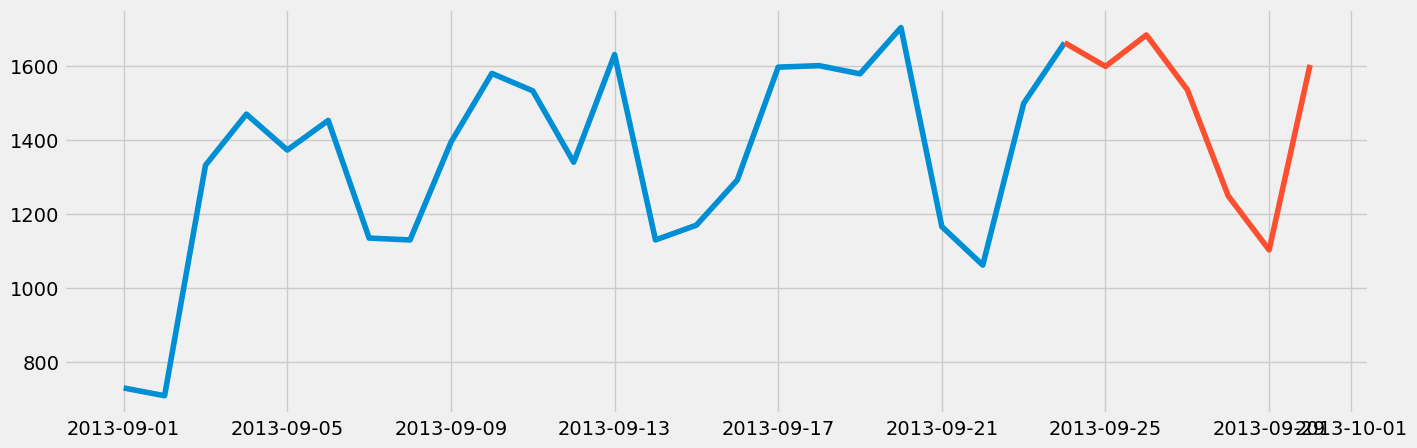

In [104]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [105]:
test.shape

(7,)

In [120]:
from statsmodels.tsa.api import ARIMA 

In [118]:
from statsmodels.tsa.arima_model import ARMA

                               SARIMAX Results                                
Dep. Variable:             ride_count   No. Observations:                   24
Model:                 ARIMA(4, 0, 3)   Log Likelihood                -161.964
Date:                Mon, 28 Aug 2023   AIC                            341.927
Time:                        15:14:58   BIC                            352.530
Sample:                    09-01-2013   HQIC                           344.740
                         - 09-24-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1344.4118     46.235     29.078      0.000    1253.793    1435.031
ar.L1          0.6837      0.325      2.107      0.035       0.048       1.320
ar.L2         -0.1725      0.232     -0.743      0.4

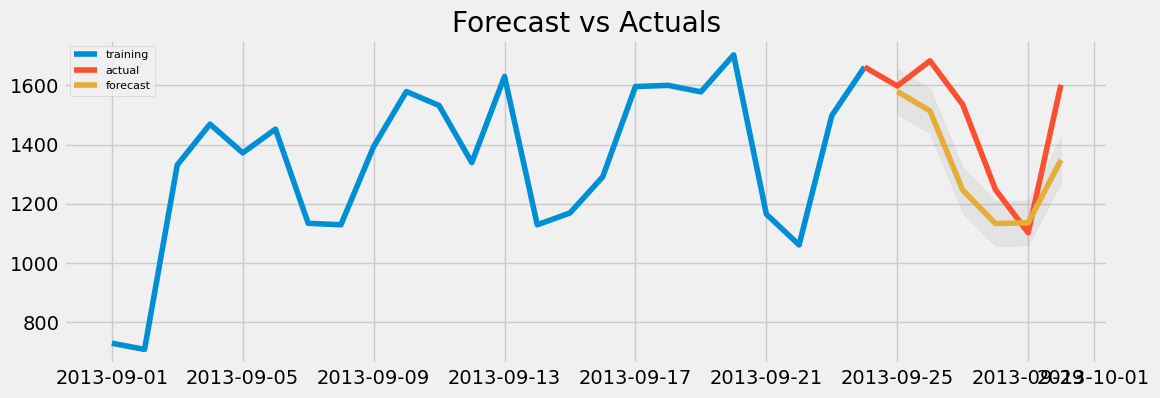

In [126]:
model = ARIMA(train, order=(4,0,3))  
fitted = model.fit()
print(fitted.summary())

forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  

se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  


conf = 1.96 * se  

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# iterating

                               SARIMAX Results                                
Dep. Variable:             ride_count   No. Observations:                   24
Model:                 ARIMA(7, 0, 0)   Log Likelihood                -160.906
Date:                Mon, 28 Aug 2023   AIC                            339.812
Time:                        15:24:01   BIC                            350.415
Sample:                    09-01-2013   HQIC                           342.625
                         - 09-24-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1342.9658    168.870      7.953      0.000    1011.987    1673.944
ar.L1          0.3891      0.277      1.402      0.161      -0.155       0.933
ar.L2         -0.2598      0.352     -0.738      0.4

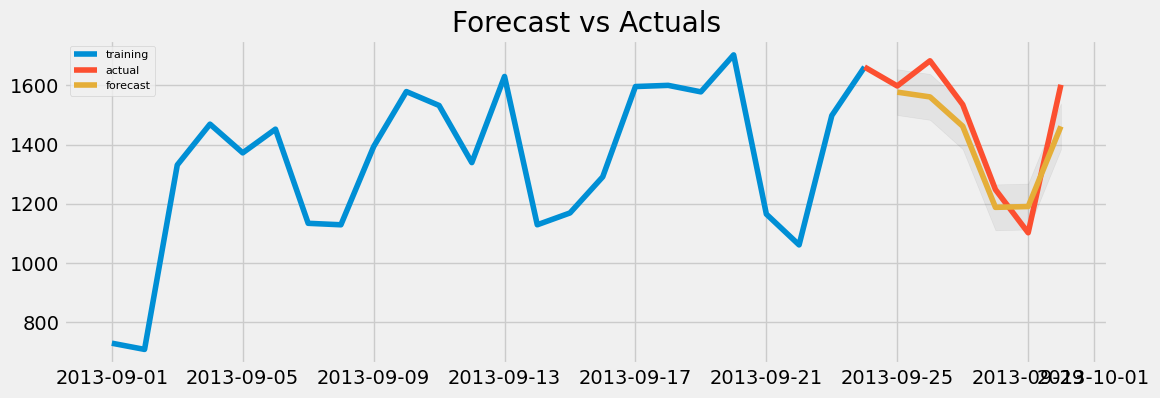

In [147]:
model = ARIMA(train, order=(7,0,0))  
fitted = model.fit()
print(fitted.summary())

forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  

se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  

conf = 1.96 * se  

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()